In [32]:
import pandas as pd
#is this committing correctly?
# List of column headers you want to select
selected_columns = ['RFTX0_In(dBm)', 'RF_out_calculated(dBm)']  # Replace these with actual column headers

# Assuming 'test.txt' is a comma-separated values (CSV) file
data = pd.read_csv('amp_lin_test_5_8_24.txt', usecols=selected_columns)

# Now `data` contains only the selected columns from 'test.txt'
print(data)

    RF_out_calculated(dBm)  RFTX0_In(dBm)
0                    43.35              0
1                    40.98             -1
2                    38.28             -2
3                    34.81             -3
4                    31.27             -4
5                    28.30             -5
6                    24.56             -6
7                    21.43             -7
8                    17.85             -8
9                    13.89             -9
10                   10.76            -10


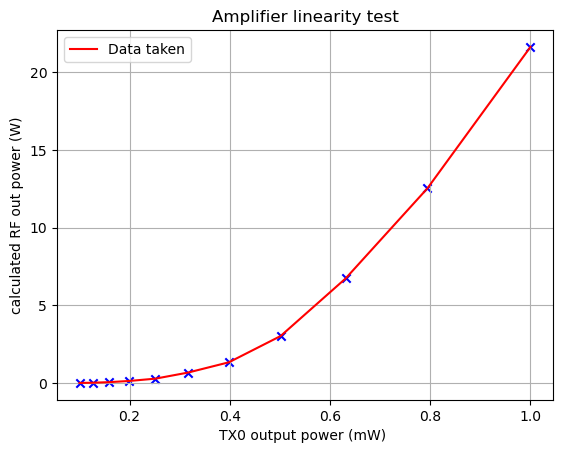

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

# Define the function you want to plot
def custom_function(x, m, c):
    return m * x + c

# Use the data loaded from the previous step
x_data = data['RFTX0_In(dBm)'].values  # Replace 'x_column' with the actual column name for x
y_data = data['RF_out_calculated(dBm)'].values  # Replace 'y_column' with the actual column name for y
x_data_watts =10**(x_data/10)
y_data_watts =10**(y_data/10)/1000

'''
# Perform the chi-squared fit
popt, pcov = curve_fit(custom_function, x_data, y_data)

# Optimal values for m and c
m_optimal, c_optimal = popt

#calculate chi^2
residuals = y_data - custom_function(x_data, *popt)
chi_squared = np.sum(residuals**2)
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Data')

# Plot the fitted function

plt.plot(x_fit, y_fit, color='red', label=f'label')
'''

# Display function and fit parameters in the graph
#plt.text(0.05, 0.95, f'Fit: y = {m_optimal:.2f}x + {c_optimal:.2f}, Chi^2 ={chi_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
title = 'Amplifier linearity test'
label = 'Data taken'
#plt.axis([-10, 0, 0, 50])
#plt.xlim=[-10,0]
#plt.ylim=[0,50]
plt.plot(x_data_watts, y_data_watts, color='red', label=f'{label}')
plt.scatter(x_data_watts, y_data_watts, marker = 'x', c='b')

#Mingee suggests plotting a y=ax with a=500,118 
'''
fit_x = np.arange(-10,1,1)
fit_y= fit_x*4 +50
plt.plot(fit_x, fit_y, color='green', label=f'y=4*x+50')
'''

plt.xlabel('TX0 output power (mW) ')
plt.ylabel('calculated RF out power (W)')
plt.title(f'{title}')
plt.legend()
plt.grid(True)
plt.show()